In [36]:
from PIL import Image, ImageFilter

# replace with the filename of your image 
my_image = Image.open("example.jpg")

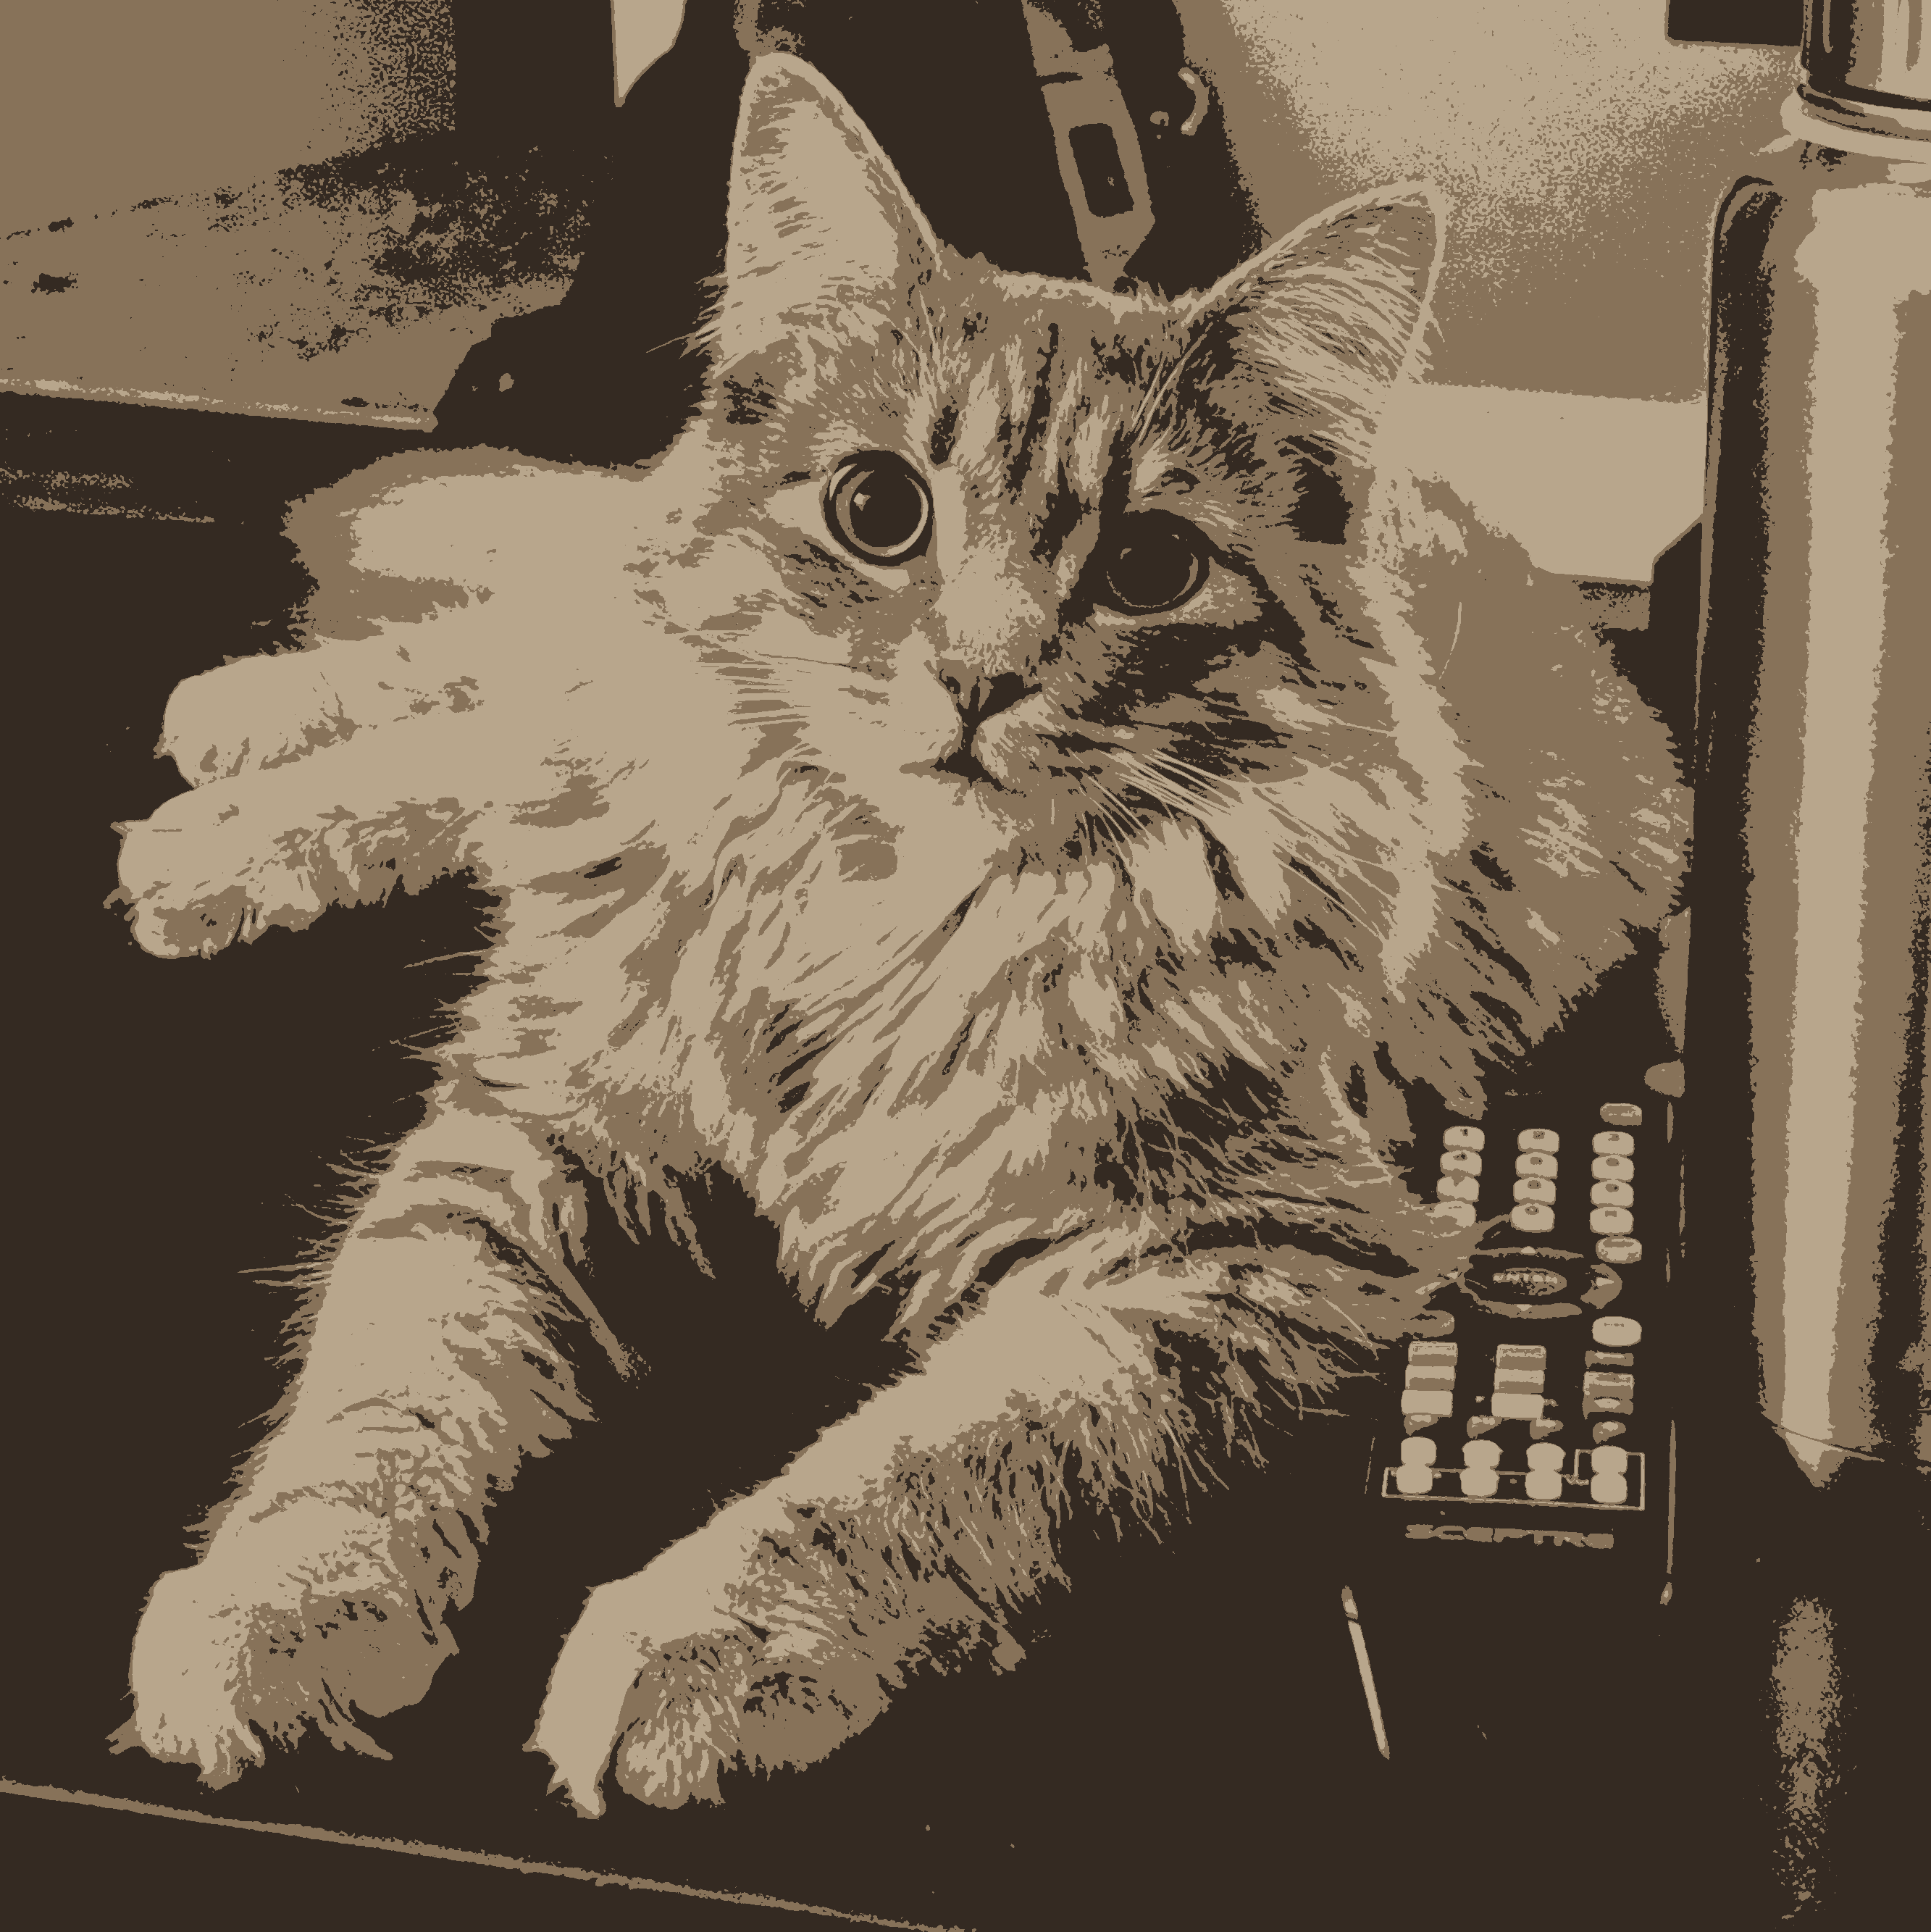

In [37]:
rgb = my_image.convert('RGB')

# parameters
# colors -> number of colors the final quantized image should contain
# method -> these are different methods of quantization eg: None, 1, 2
quant = rgb.quantize(colors=3,method=None,dither=None)
quant

[(3108579, (52, 42, 34)), (2239092, (135, 114, 89)), (1762551, (184, 166, 140))]


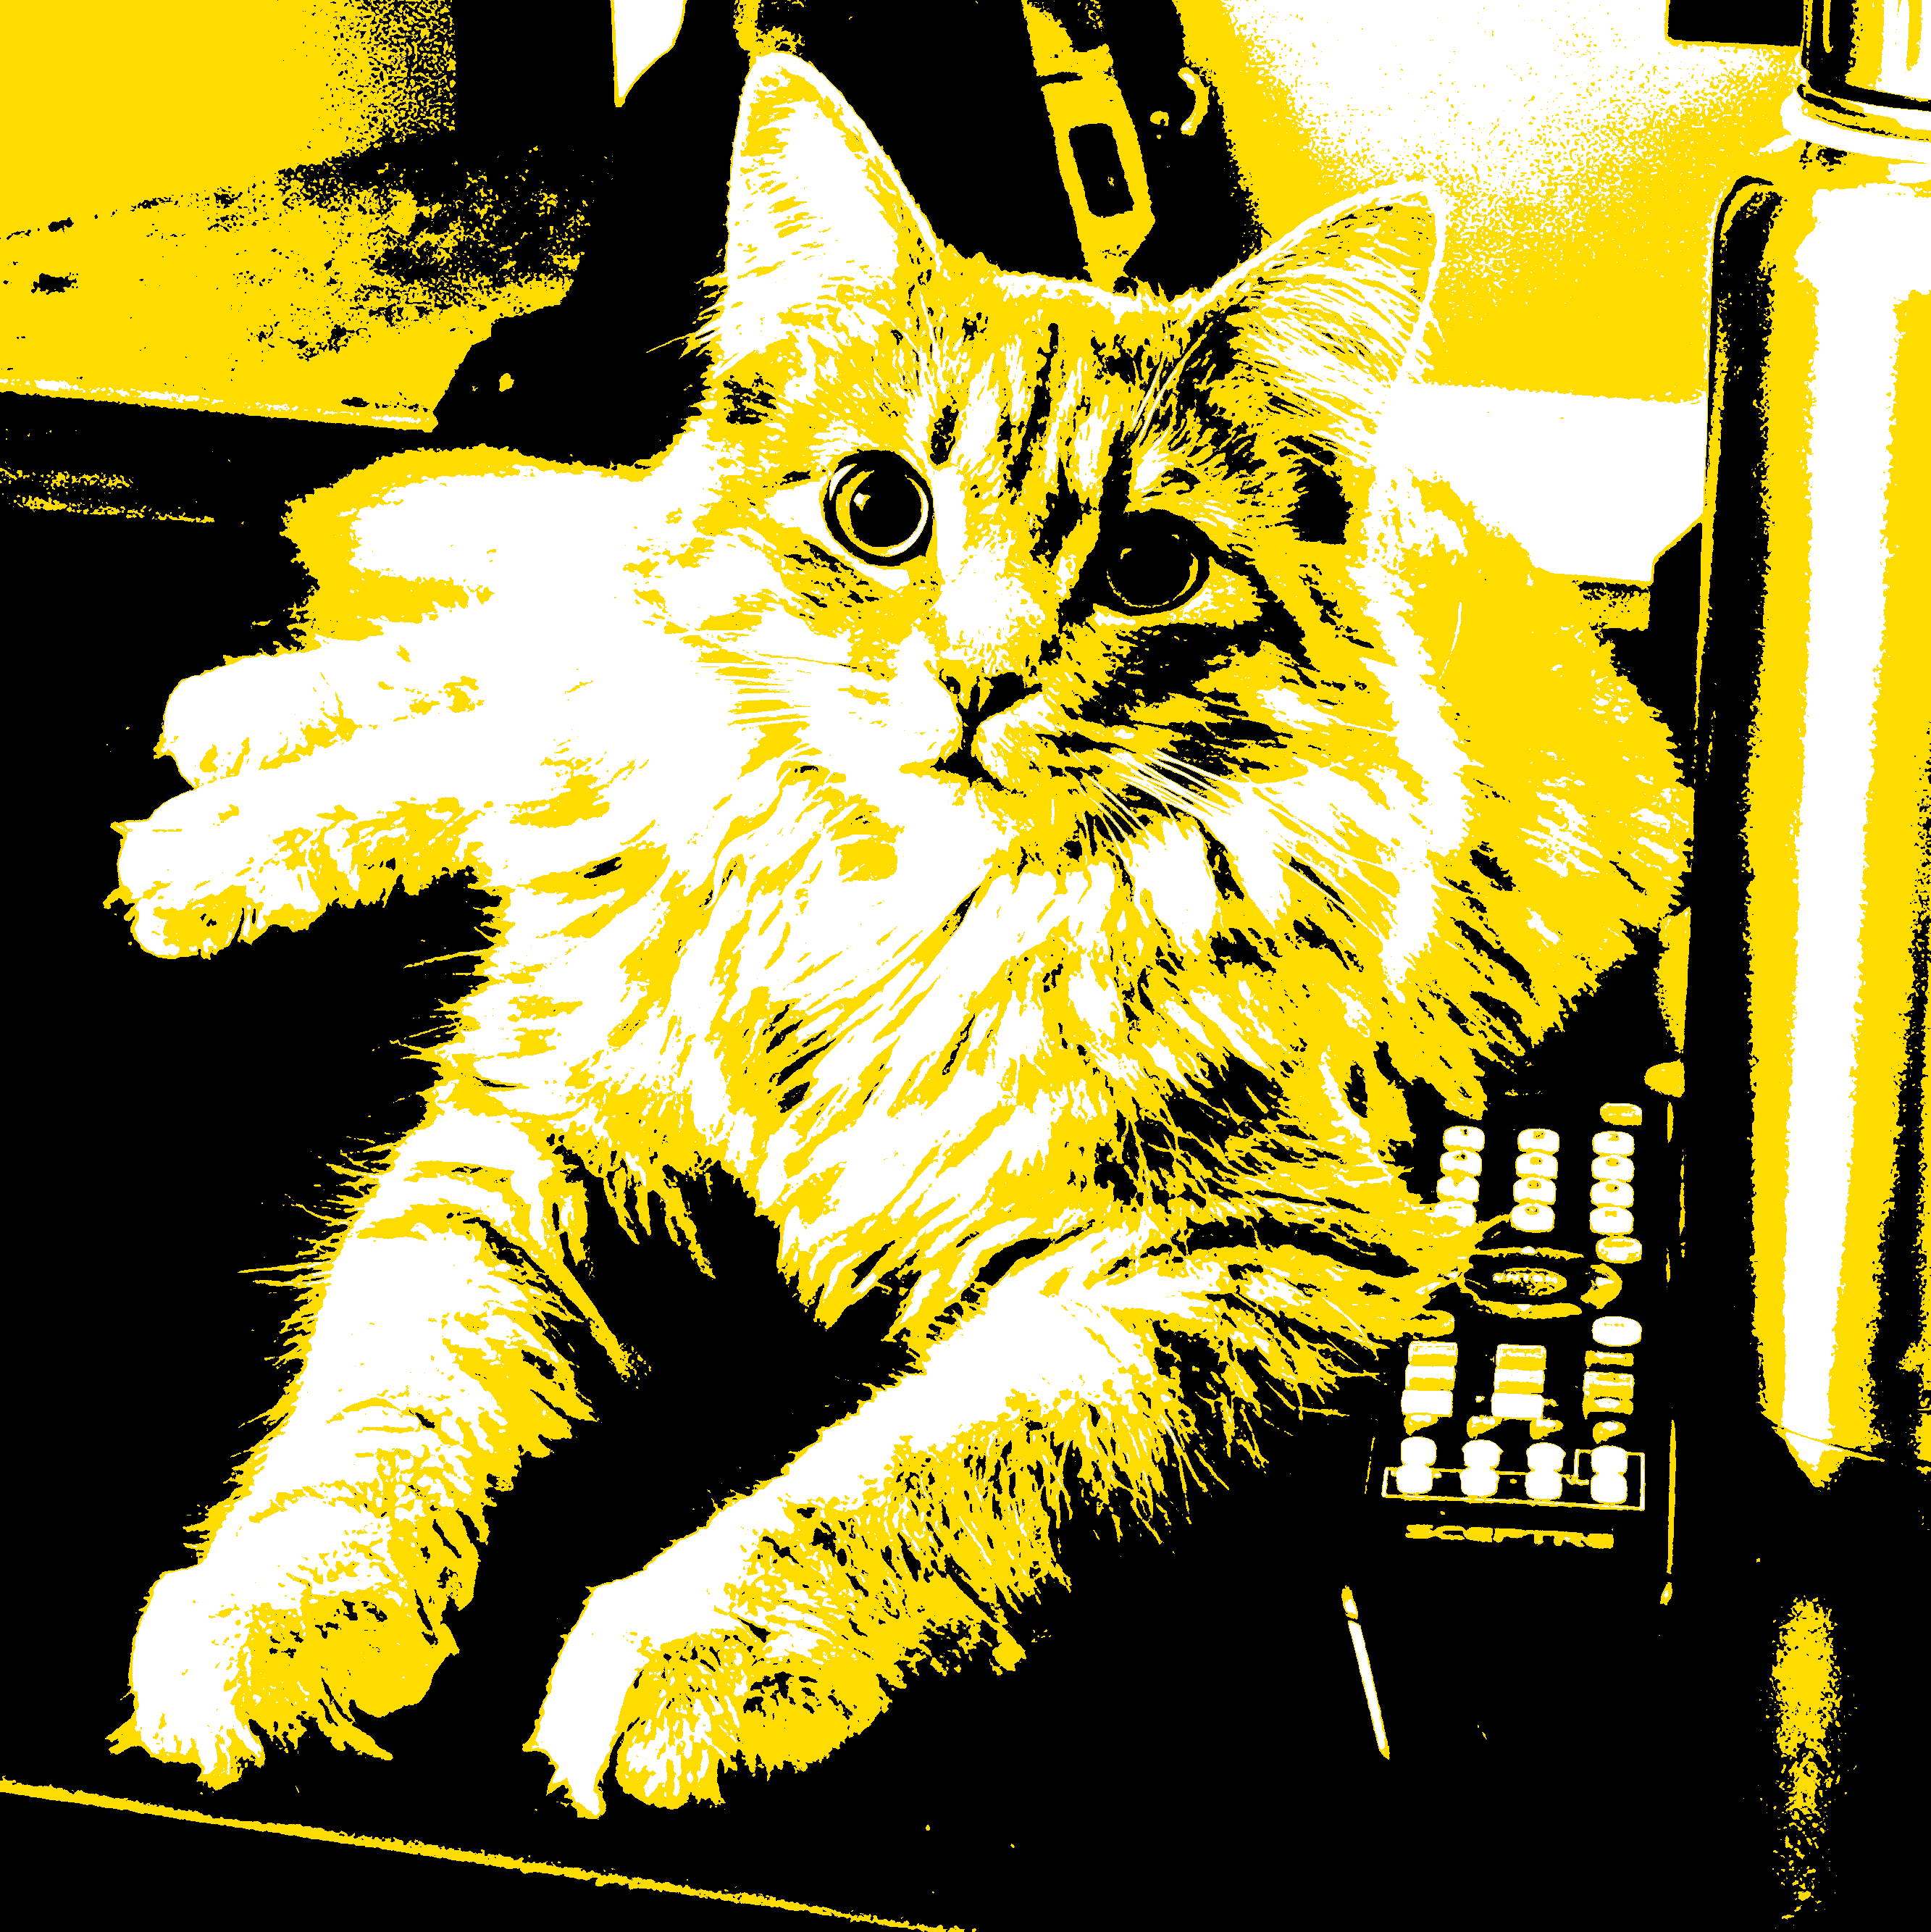

In [38]:
# grab colors used in quantized image
quant_rgb = quant.convert("RGB")
colors = quant_rgb.getcolors()

# sort by darkness
colors.sort(key=lambda x: sum(x[1]))
print(colors)

# generate images for preview, color channel, and b/w channel
preview = Image.new('RGB', my_image.size, 0xffffffff)
black = Image.new('1', my_image.size, 1)
yellow = Image.new('1', my_image.size, 1)
width, height = my_image.size

for x in range(width):
    for y in range(height):
        rgb = quant_rgb.getpixel((x,y))
        if rgb == colors[0][1]:
            preview.putpixel((x,y), (0,0,0))
            black.putpixel((x,y), 0)
        elif rgb == colors[1][1]:
            preview.putpixel((x,y), (255,220,0))
            yellow.putpixel((x,y), 0)
        else:
            preview.putpixel((x,y), (255,255,255))

preview            

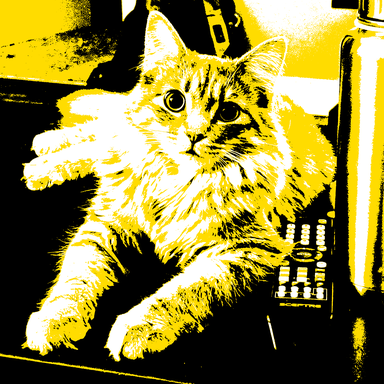

In [39]:
# resize to the correct resolution
size = (640, 384)
preview.thumbnail(size,Image.ANTIALIAS)
black.thumbnail(size,Image.ANTIALIAS)
yellow.thumbnail(size,Image.ANTIALIAS)
preview

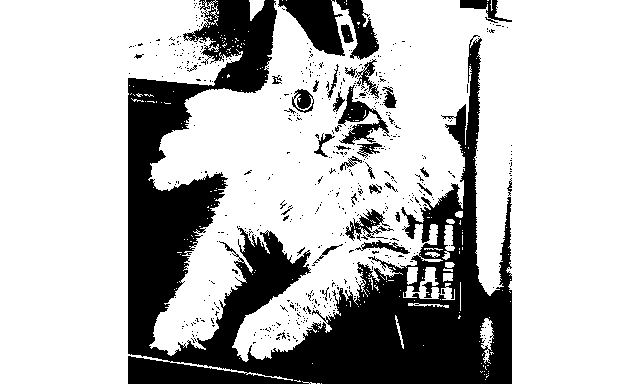

In [40]:
# preview of black channel
black_resized = Image.new('RGBA', size, (255, 255, 255, 0))
black_resized.paste(
    black, (int((size[0] - black.size[0]) / 2), int((size[1] - black.size[1]) / 2))
)
black_resized

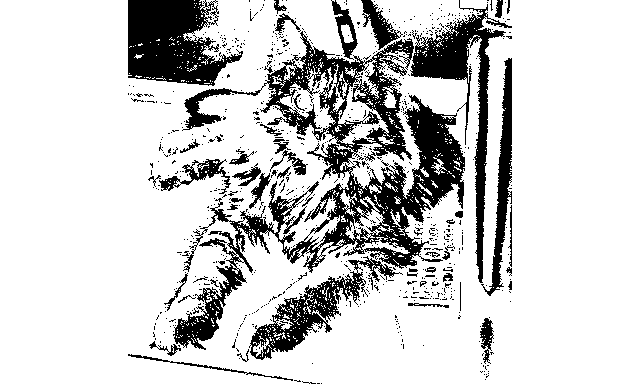

In [41]:
# preview of color channel
yellow_resized = Image.new('RGBA', size, (255, 255, 255, 0))
yellow_resized.paste(
    yellow, (int((size[0] - yellow.size[0]) / 2), int((size[1] - yellow.size[1]) / 2))
)
yellow_resized

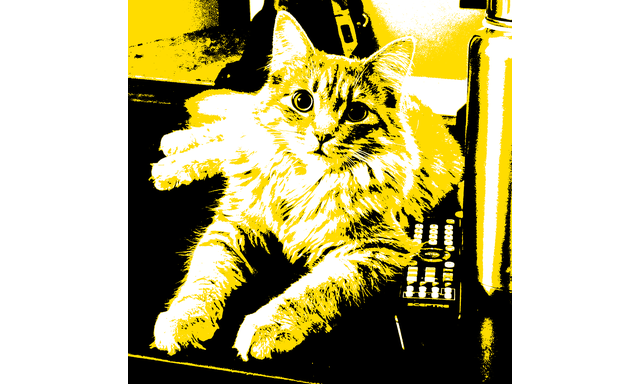

In [42]:
# preview example of display image
preview_resized = Image.new('RGBA', size, (255, 255, 255, 0))
preview_resized.paste(
    preview, (int((size[0] - preview.size[0]) / 2), int((size[1] - preview.size[1]) / 2))
)
preview_resized

In [43]:
# convert to bitmap and save images
black_resized.convert("1")
yellow_resized.convert("1")
black_resized.save("b.bmp")
yellow_resized.save("y.bmp")

In [ ]:
# done